#**1.Introduction**


##**Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format

## **Read File**

In [ ]:
file_path = '/content/adjusted_sales_data.csv'
df = pd.read_csv(file_path)

# **2.Eyeballing**

In [ ]:
df.head(3)

,customer_id,order_date,order_amount,stage,signup_date
0,2,2023-10-09,97.29,Visited,2023-06-02
1,2,2023-08-12,84.92,Visited,2023-06-02
2,2,2023-10-13,29.11,Visited,2023-06-02


In [ ]:
df.tail(2)

,customer_id,order_date,order_amount,stage,signup_date
27986,9998,2024-05-10,35.94,Visited,2022-11-26
27987,10000,2024-05-15,56.86,Visited,2024-03-14


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27988 entries, 0 to 27987
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customer_id   27988 non-null  int64  
 1   order_date    27988 non-null  object 
 2   order_amount  27988 non-null  float64
 3   stage         27988 non-null  object 
 4   signup_date   27988 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 1.1+ MB


In [ ]:
df.columns.to_list()

['customer_id', 'order_date', 'order_amount', 'stage', 'signup_date']

From the info above;


We need to convert dates into datetime objects

In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27988 entries, 0 to 27987
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   customer_id   27988 non-null  int64         
 1   order_date    27988 non-null  datetime64[ns]
 2   order_amount  27988 non-null  float64       
 3   stage         27988 non-null  object        
 4   signup_date   27988 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(1)
memory usage: 1.1+ MB


In [ ]:
#Mcheck for missing values
df.isna().sum()

,0
customer_id,0
order_date,0
order_amount,0
stage,0
signup_date,0


In [ ]:
#check for duplicates
df.duplicated().sum()

0

# **3.Brief EDA**

In [ ]:
#check start and end dates
start_date = df['order_date'].min()
end_date = df['order_date'].max()
duration = start_date-end_date
print(f'Start{start_date}\nEnd {end_date}\nDuration{duration}')


Start2022-05-24 00:00:00
End 2024-05-21 00:00:00
Duration-728 days +00:00:00


In [ ]:
df['stage'].unique()

array(['Visited', 'Added to Cart', 'Purchased'], dtype=object)

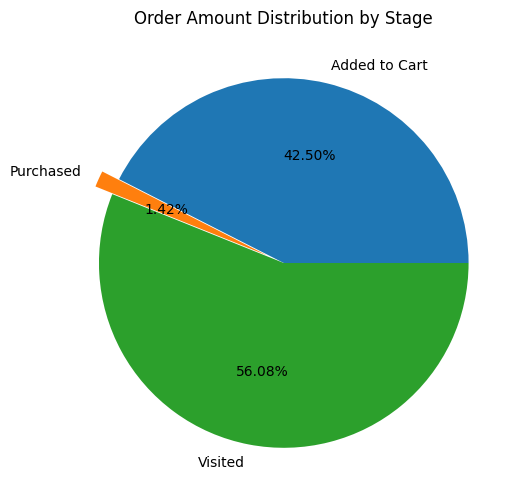

In [ ]:
df.groupby('stage')['order_amount'].sum().plot(
    kind='pie',
    autopct='%1.2f%%',
    figsize=(8, 6),
    explode = (0,0.1,0)
)
plt.ylabel('')

plt.title('Order Amount Distribution by Stage')
plt.show()

# **4. Hypothesis Testing**

**Is there statistically significant difference in order amounts across the three stages: Visited, Added to Cart, and Purchased?**

$H_0$: There is no significant statistical difference in the mean order amounts between different stages

$H_1$: At least one stage has a significantly different mean order amount

$\alpha = 0.05$

In [ ]:
#Check the type of test to be done
df['stage'].nunique()

3

In [ ]:
from scipy.stats import f_oneway


list_of_data = []


for stag in df['stage'].unique():

  un_df      = df[df['stage']==stag]['order_amount']
  un_df_list  = un_df.to_list()
  list_of_data.append(un_df_list)



stats , p_value = f_oneway(*list_of_data)

print(f'Stats :{stats}\np_value : {p_value}')


alpha = 0.05
print("\nInterpretation:")

if p_value > alpha:
    print("Fail to Reject the Null Hypothesis (H0). ")
else:
    print("Reject the Null Hypothesis (H0).")





Stats :7180.989601115414
p_value : 0.0

Interpretation:
Reject the Null Hypothesis (H0).


# **5.Conclusion**

The results indicate that we reject the null hypothesis


That means that at least one stage has a significantly different mean order amount